# Model for prediction of the polymer adsorption energies

In [12]:
from gpt3forchem.data import get_polymer_data, POLYMER_FEATURES
from gpt3forchem.baselines import XGBRegressionBaseline
from gpt3forchem.output import get_regression_metrics
import joblib
from IPython.utils import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])

In [2]:
df = get_polymer_data()

In [4]:
X = df[POLYMER_FEATURES]
y = df["deltaGmin"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [9]:
model = XGBRegressionBaseline(524524)

In [10]:
from IPython.utils import io

with io.capture_output() as captured:
    model.tune(X_train, y_train);

[I 2022-09-15 11:32:13,916] A new study created in memory with name: no-name-8a42e378-7471-41f8-9b46-718062ad17de
[I 2022-09-15 11:43:00,244] Trial 0 finished with value: 0.35889966765486897 and parameters: {'max_depth': 4, 'learning_rate': 0.027215111861196635, 'colsample_bytree': 0.2814842333513658, 'subsample': 0.7202263236703039, 'alpha': 1.2367036045195612, 'lambda': 0.00011112374444674256, 'gamma': 3.510707440556462e-07, 'min_child_weight': 192.46617509188758}. Best is trial 0 with value: 0.35889966765486897.
[I 2022-09-15 12:06:17,119] Trial 1 finished with value: 0.3694140762921749 and parameters: {'max_depth': 10, 'learning_rate': 0.0055371071961001685, 'colsample_bytree': 0.553742444156134, 'subsample': 0.49829309779991837, 'alpha': 0.4163596736458092, 'lambda': 0.24714493021949627, 'gamma': 4.829899501504059e-07, 'min_child_weight': 203.65782749283758}. Best is trial 0 with value: 0.35889966765486897.
[I 2022-09-15 12:08:45,220] Trial 2 finished with value: 10.96473208979128

In [14]:
model.fit(X_train, y_train)

In [15]:
test_predictions = model.predict(X_test)

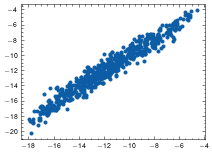

In [16]:
plt.scatter(test_predictions, y_test)

In [17]:
get_regression_metrics(y_test, test_predictions)

{'r2': 0.9404574618463781,
 'max_error': 2.460967379324014,
 'mean_absolute_error': 0.6409836593059829,
 'mean_squared_error': 0.6282261449125899}

In [19]:
model.fit(X, y)
joblib.dump(model, '../models/delta_g_model.joblib')

['../models/delta_g_model.joblib']